# The Get Rich Quickly Project

In the following I try to get familiarized with the financial markets libraries for python

In [2]:
import pandas as pd
import datetime
import mplfinance as mpf
import yfinance as yf
import pandas_datareader.data as web
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, IntSlider

### loading the tesla stock prices

In [3]:
stock_info = yf.Ticker('TSLA').info
# stock_info.keys() for other properties you can explore
market_price = stock_info['regularMarketPrice']
previous_close_price = stock_info['regularMarketPreviousClose']
print('market price ', market_price)
print('previous close price ', previous_close_price)


market price  277.7
previous close price  284.82


In [4]:
df = pd.DataFrame([stock_info])

In [5]:
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,bid,tradeable,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio
0,78725,Consumer Cyclical,99290,"Tesla, Inc. designs, develops, manufactures, l...",Austin,(512) 516-8177,TX,United States,[],https://www.tesla.com,...,278.7,False,None,1800,288.48,None,277.7,280.29,https://logo.clearbit.com/tesla.com,2.0289


In [6]:
### Getting temporal data using yfinance
data = yf.download("AAPL GOOG AMZN MSFT", start="2020-01-01", end="2022-08-30")


[*********************100%***********************]  4 of 4 completed


In [7]:
#aapl = web.DataReader('AAPL.US', 'quandl','2020-01-01', '2022-01-01')

<AxesSubplot:xlabel='Date'>

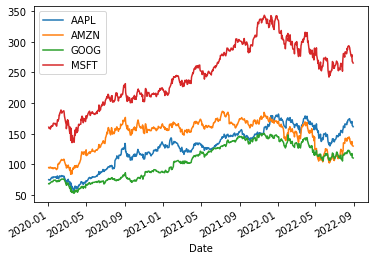

In [8]:
data.Close.plot()

<AxesSubplot:xlabel='Date'>

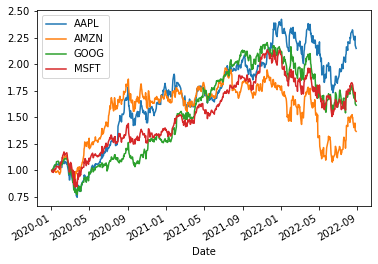

In [9]:
#To Normalize the stocks for fair comparison one can divide by the start value
returns = data.Close/data.Close.iloc[0]

returns.plot()

In [10]:
data.Close.iloc[0] # when you divide by it own we see the relate price changes

AAPL     75.087502
AMZN     94.900497
GOOG     68.368500
MSFT    160.619995
Name: 2020-01-02 00:00:00, dtype: float64

In [11]:
returns

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.990278,0.987861,0.995093,0.987548
2020-01-06,0.998169,1.002566,1.019629,0.990101
2020-01-07,0.993474,1.004663,1.018993,0.981073
2020-01-08,1.009456,0.996818,1.027023,0.996700
...,...,...,...,...
2022-08-23,2.227135,1.408001,1.678697,1.721081
2022-08-24,2.231130,1.409898,1.677673,1.717034
2022-08-25,2.264425,1.446568,1.721553,1.736085


In [12]:
#Creating a portfolio of the above stocks
N = len(data.Close.transpose())
returns['PORTFOLIO'] = returns.iloc[:,0:N].sum(axis=1) / N

In [13]:
returns.head(2)


,AAPL,AMZN,GOOG,MSFT,PORTFOLIO
Date,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.990278,0.987861,0.995093,0.987548,0.990195


In [14]:
daily_pct_change = np.log(returns.pct_change() + 1)
vols = daily_pct_change.std() * np.sqrt(252)
vols

AAPL         0.366435
AMZN         0.380414
GOOG         0.336231
MSFT         0.344546
PORTFOLIO    0.316881
dtype: float64